In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

# Load the datasets

final_merged_df = pd.read_csv('final_merged_all_years.csv')
gender_df = pd.read_csv('gender_state.csv')
gender_year = pd.read_csv('gender_year.csv', skiprows=2)
race_df = pd.read_csv('Race-Ethnicity DiabetesAtlas_NationalData.csv', skiprows=2)

def is_numeric(x):
    try:
        float(x)
        return True
    except (ValueError, TypeError):
        return False
# Filter rows where the 'Year' column contains numeric values
final_merged_df = final_merged_df[final_merged_df['Year'].apply(is_numeric)]
race_df = race_df[race_df['Year'].apply(is_numeric)]

# Convert the 'Year' column values to integers
final_merged_df['Year'] = final_merged_df['Year'].astype('Int64')
race_df['Year'] = race_df['Year'].astype('Int64')


In [2]:
final_merged_df.head()

,Year,State,Rate,Deaths,Percentage,Lower Limit,Upper Limit,Diagnosed Diabetes (Percentage),Obesity (Percentage),Newly Diagnosed Diabetes (Rate per 1000),Newly Diagnosed Physical Inactivity (Percentage),18-44 percentage,45-64 percentage,65-74 percentage,75+ percentage
0,2000,Alabama,NaN,NaN,9.7,7.2,13,NaN,NaN,NaN,NaN,2.3,11.4,15.4,15.5
1,2000,Alaska,NaN,NaN,Suppressed,Suppressed,Suppressed,NaN,NaN,NaN,NaN,1.1,8.3,NaN,NaN
2,2000,Arizona,NaN,NaN,Suppressed,Suppressed,Suppressed,NaN,NaN,NaN,NaN,1.4,10.7,13.4,NaN
3,2000,Arkansas,NaN,NaN,8.5,5.8,12.3,NaN,NaN,NaN,NaN,2.2,8.7,12.7,12.5
4,2000,California,NaN,NaN,13.3,9.3,18.7,NaN,NaN,NaN,NaN,2.9,9.3,15.9,16.6


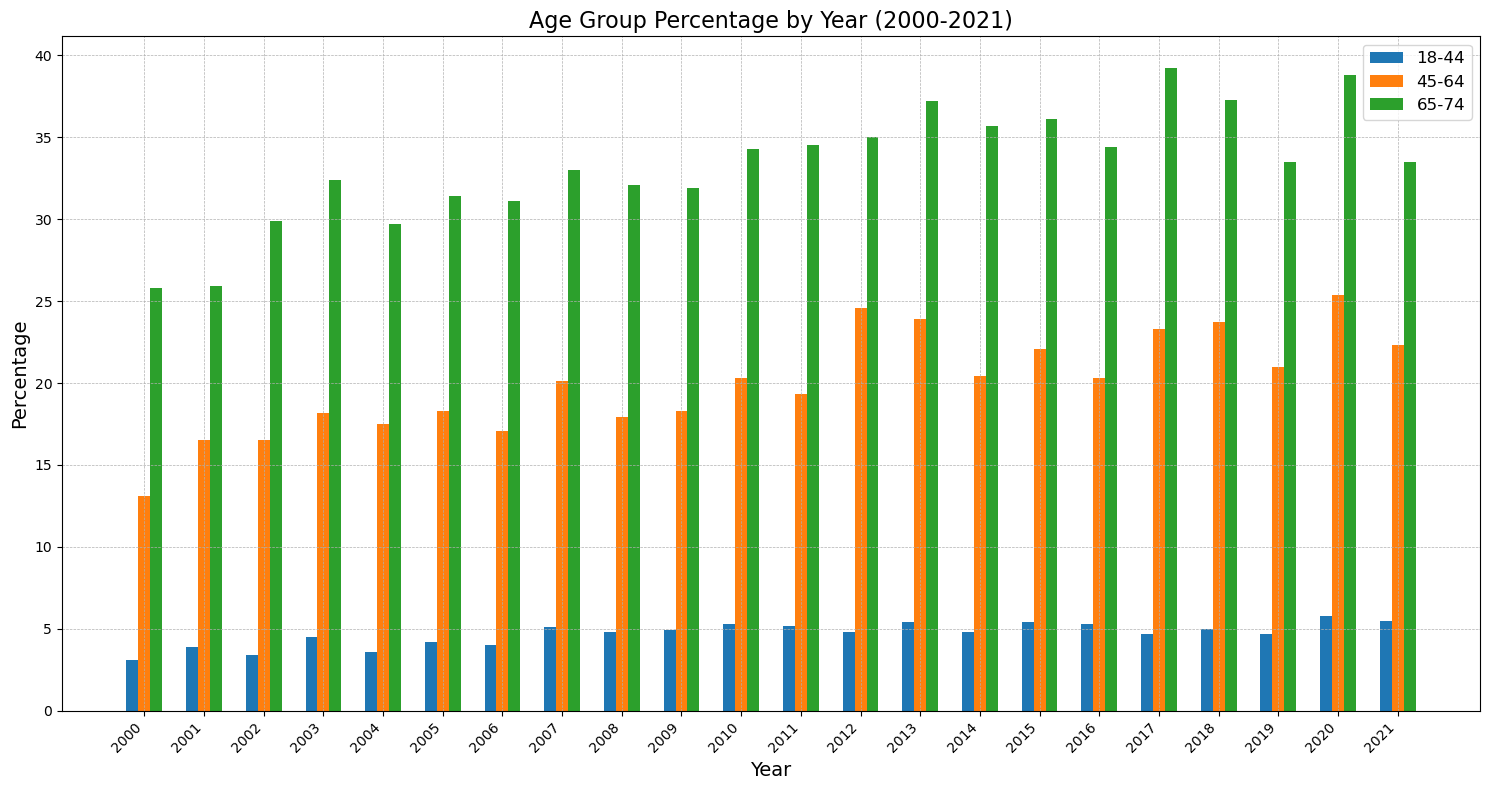

In [11]:
# Remove rows with NaN values in 'Year' column
final_merged_df_cleaned = final_merged_df.dropna(subset=['Year'])

# Convert 'Year' to integer now that NaNs are removed
final_merged_df_cleaned['Year'] = final_merged_df_cleaned['Year'].astype(int)

# Convert percentage columns to floats, filling NaN with 0
final_merged_df_cleaned['18-44 percentage'] = pd.to_numeric(final_merged_df_cleaned['18-44 percentage'], errors='coerce').fillna(0)
final_merged_df_cleaned['45-64 percentage'] = pd.to_numeric(final_merged_df_cleaned['45-64 percentage'], errors='coerce').fillna(0)
final_merged_df_cleaned['65-74 percentage'] = pd.to_numeric(final_merged_df_cleaned['65-74 percentage'], errors='coerce').fillna(0)

# Filter the DataFrame to include only years 2000 through 2024
final_merged_filtered = final_merged_df_cleaned[(final_merged_df_cleaned['Year'] >= 2000) & (final_merged_df_cleaned['Year'] <= 2021)]

# Create a figure and a set of subplots with an increased figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting each age group percentage by Year with a slight shift along the x-axis for clarity
ax.bar(final_merged_filtered['Year'] - 0.2, final_merged_filtered['18-44 percentage'], width=0.2, label='18-44', align='center')
ax.bar(final_merged_filtered['Year'], final_merged_filtered['45-64 percentage'], width=0.2, label='45-64', align='center')
ax.bar(final_merged_filtered['Year'] + 0.2, final_merged_filtered['65-74 percentage'], width=0.2, label='65-74', align='center')

# Adding labels and title
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Age Group Percentage by Year (2000-2021)', fontsize=16)

# Rotate X-tick labels for better readability and set the interval for displaying them
plt.xticks(final_merged_filtered['Year'].unique(), rotation=45, ha='right')

# Adding a legend with fontsize set to large for better readability
ax.legend(fontsize='large')

# Adding grid lines for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Using tight layout to fit everything neatly
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
race_df.head()

In [ ]:

df = final_merged_df
# Replace '' with the name of the column you want to analyze
target_column = 'Deaths'

# Convert the 'Year' column to numeric, round it, and fill non-numeric values with NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').round().astype('Int64')

# Convert the 'target_column' to numeric, round it, and fill non-numeric values with NaN
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')

# Filter rows where both the 'Year' and target column are not NaN
numeric_df = df[df['Year'].notna() & df[target_column].notna()]

# Group the data by 'Year'
grouped = numeric_df.groupby(['Year'])

# Define the statistical measures you want to calculate for the target column
agg_functions = {
    target_column: ['mean', 'median', 'std', 'min', 'max'],
}

# Perform the statistical analysis and store the results in a new DataFrame
result_df = grouped.agg(agg_functions)

# Reset the index to make the 'Year' column a regular column
result_df = result_df.reset_index()

# Display the statistical analysis results
print(result_df)

In [ ]:
# Find change in a column for each state from the merged df over the years provided 
import pandas as pd

df = final_merged_df
state_column = 'State'
numeric_column = 'Newly Diagnosed Diabetes (Rate per 1000)'
numeric_value_label = 'Change in ' + numeric_column  # Define the label

# Convert the 'Year' column to numeric, round it, and fill non-numeric values with NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').round().astype('Int64')

# Convert the 'Percentage' column to numeric, handling non-numeric values by setting them to NaN
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')

# Filter rows where both the 'Year' and 'Percentage' columns are not NaN
numeric_df = df[df['Year'].notna() & df[numeric_column].notna()]

# Get a list of all unique state values
unique_states = numeric_df[state_column].unique()

# Initialize an empty list to store dictionaries of results
results_list = []

# Iterate through each unique state and calculate the change as specified
for state in unique_states:
    state_data = numeric_df[numeric_df[state_column] == state]
    if len(state_data) > 1:  # Check if there are at least two numeric values to calculate change
        lowest_value = state_data[numeric_column].min()
        highest_value = state_data[numeric_column].max()
        change = highest_value - lowest_value
        results_list.append({state_column: state, numeric_value_label: change})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Sort the results DataFrame in descending order based on the 'Change in Percentage' column
results_df = results_df.sort_values(by=numeric_value_label, ascending=False)

# Display the sorted change in values for each state
print(results_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load your dataset (replace with your own dataset)
df = final_merged_df

# Specify the column names for the two variables you want to analyze
x_column = 'Year'  # Replace with your actual column name
y_column = 'Newly Diagnosed Diabetes (Rate per 1000)'  # Replace with your actual column name

# Specify the column name and value to filter by (optional)
filter_column = 'State'  # Replace with the column to filter by
filter_value = 'Texas'    # Replace with the value to filter for

# Convert columns to numeric, convert non-numeric values to NaN
df[x_column] = pd.to_numeric(df[x_column], errors='coerce')
df[y_column] = pd.to_numeric(df[y_column], errors='coerce')

# Remove rows with NaN values in either column
df = df.dropna(subset=[x_column, y_column])

# Optionally, filter the data based on another column
if filter_column and filter_value:
    df = df[df[filter_column] == filter_value]

# Extract the data from the DataFrame
x_data = df[x_column].astype(float)  # Ensure the data type is float
y_data = df[y_column].astype(float)  # Ensure the data type is float

# Create a scatterplot
plt.scatter(x_data, y_data, label='Data Points')

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(x_data, y_data, 1)
line_of_best_fit = slope * x_data + intercept

# Calculate the correlation coefficient (Pearson correlation)
correlation_coefficient, _ = pearsonr(x_data, y_data)

# Plot the line of best fit and add the equation to the plot
plt.plot(x_data, line_of_best_fit, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

# Add the correlation coefficient to the plot
plt.text(0.8, 0.1, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add labels and legend
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Assuming you have your 'race_df' DataFrame loaded with the data

# Specify the columns to calculate the difference for
columns_to_calculate = ['Hispanic - Percentage', 'Non-Hispanic White - Percentage', 'Non-Hispanic Black - Percentage', 'Non-Hispanic Asian - Percentage']

# Round the 'Year' column to the nearest whole number and convert it to integers
race_df['Year'] = pd.to_numeric(race_df['Year'], errors='coerce').round().astype('Int64')

# Filter out non-numeric rows based on the 'Year' column
race_df = race_df.dropna(subset=['Year'])

# Initialize an empty list to store the differences
differences = []

# Calculate the difference for each specified column
for column in columns_to_calculate:
    max_value = race_df[column].max()
    min_value = race_df[column].min()
    
    # Calculate the difference between max and min
    diff = max_value - min_value
    
    # Append the results to the list
    differences.append({'Column': column, 'Change': diff})

# Create a DataFrame from the list of differences
differences_df = pd.DataFrame(differences)

# Sort the DataFrame by the 'Change' column in descending order
differences_df = differences_df.sort_values(by='Change', ascending=False)

print("Differences between the highest and lowest values for each column (sorted by Change in descending order):")
print(differences_df)

In [ ]:
# Select the desired columns
selected_columns = ['Year', 'Male - Percentage', 'Female - Percentage']

# Create a new DataFrame with the selected columns
selected_df = gender_year[selected_columns]
selected_df['Year'] = pd.to_numeric(race_df['Year'], errors='coerce').round().astype('Int64')
# Specify whether you want to order by 'Male Percentage' or 'Female Percentage'
order_by = 'Male - Percentage'  # Change to 'Female Percentage' if needed

# Optional: Sort the DataFrame by the selected column in descending order
if order_by in selected_df.columns:
    selected_df = selected_df.sort_values(by=order_by, ascending=False)

# Display the resulting DataFrame
print(selected_df)